In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt



impacts = pd.read_csv('../../data/raw/impacts.csv')

# Analysis Pipeline

I am essentially getting rid of null values, organizing the data, and renaming some columns to make it more readable. Also, I have dropped the "Maximum Torino Scale" column as most of the values are zero.


In [7]:


impacts_processed = (impacts.dropna()
                     .reset_index(drop=True)
                     .rename(columns={"Period Start": "Risk Period Start", "Period End": "Risk Period End", "Object Name": "Asteroid Name"})
                     .rename(columns={"Asteroid Velocity": "Asteroid Velocity (km/s)", "Asteroid Magnitude": "Asteroid Magnitude (m)"})
                     .drop(['Maximum Torino Scale'], axis = 1)
                     .sort_values(by = 'Risk Period Start', ascending = True)
                     .loc[0:450]
                     


)

impacts_processed

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (m),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
25,2008 EK68,2017,2115,315,5.000000e-06,7.43,29.8,0.004,-7.60,-8.87
24,2012 BP123,2017,2115,228,5.900000e-07,4.60,27.1,0.013,-7.24,-8.11
23,2015 HW182,2017,2115,174,5.700000e-08,10.76,25.2,0.031,-6.69,-7.17
21,2010 WW8,2017,2114,92,5.700000e-07,4.45,26.9,0.015,-7.02,-7.73
...,...,...,...,...,...,...,...,...,...,...
442,2015 UH52,2075,2101,3,1.100000e-06,11.19,26.0,0.022,-6.59,-6.85
443,2003 YS70,2075,2107,2,7.700000e-06,3.16,28.8,0.006,-7.44,-7.48
444,2000 LG6,2075,2115,52,9.900000e-04,2.11,29.0,0.005,-5.37,-5.86
449,2015 ET,2076,2114,9,2.600000e-06,11.63,26.7,0.016,-6.58,-7.22


# Method Chaining
Calling load_and_process function which does analysis pipeline process for me


In [12]:

from scripts import project_functions
df = project_functions.load_and_process('../../data/raw/impacts.csv')
df


,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (au),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2008 EK68,2017,2115,315,5.000000e-06,7.43,29.8,0.004,-7.60,-8.87
2,2012 BP123,2017,2115,228,5.900000e-07,4.60,27.1,0.013,-7.24,-8.11
3,2015 HW182,2017,2115,174,5.700000e-08,10.76,25.2,0.031,-6.69,-7.17
4,2008 EM68,2017,2115,1144,1.300000e-05,14.54,27.8,0.010,-5.31,-5.65
...,...,...,...,...,...,...,...,...,...,...
446,2014 QF33,2076,2076,1,3.400000e-08,23.29,23.7,0.060,-6.63,-6.63
447,2014 FX32,2076,2108,3,3.100000e-06,9.05,25.1,0.033,-5.71,-5.71
448,2016 RR1,2076,2113,27,2.000000e-04,6.75,27.8,0.009,-5.42,-5.64
449,2004 VZ14,2076,2114,4,2.100000e-06,15.26,25.3,0.030,-5.92,-6.39


# EDA

In my EDA, I will be getting some information about my dataset, as well as creating a few plots to create a better understanding of my dataset to help me answer my research question.



## Getting info on dataset

In [13]:
df.describe(include='all')

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (au),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,451,451.000000,451.000000,451.000000,4.510000e+02,451.000000,451.000000,451.000000,451.000000,451.000000
unique,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2006 WP1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2043.815965,2094.620843,62.055432,7.716450e-05,11.625632,26.122616,0.055047,-6.233925,-6.591175
std,NaN,19.350781,25.572388,135.952440,5.048455e-04,6.212104,2.550115,0.175815,1.421445,1.429410
min,NaN,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.840000,-10.800000
25%,NaN,2024.000000,2079.000000,4.000000,1.500000e-07,7.270000,24.900000,0.009000,-7.160000,-7.600000
50%,NaN,2044.000000,2109.000000,13.000000,2.100000e-06,10.540000,26.500000,0.017000,-6.190000,-6.580000
75%,NaN,2061.000000,2114.000000,50.000000,2.300000e-05,15.265000,27.800000,0.035000,-5.240000,-5.650000


## Plot 1: Cumulative Impact Probability vs Possible Impacts

[Text(0.5, 1.0, 'Cumulative Impact Probability vs Possible Impacts')]

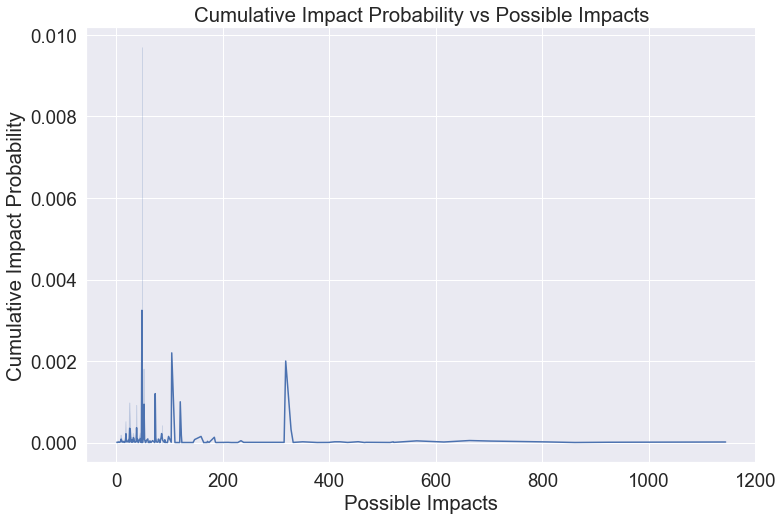

In [27]:
sns.set_theme(font_scale = 1.7)
plt.subplots(figsize=(12,8))
graph1 = sns.lineplot(x = 'Possible Impacts', y = 'Cumulative Impact Probability', data = df)
graph1.set(title= 'Cumulative Impact Probability vs Possible Impacts')


### Comments
This lineplot shows the relation between the number of possible impacts and the Cumulative Impact Probability. Other than an outlier just below 0.010, the rest of the data stays in between 0.000 and 0.004. Looking at this graph, I can conclude that even if the number of possible impacts increases, the cumulative impact probablity stays the same for the most part.

## Plot 2: Cumulative Palermo Scale vs Asteroid Diameter (km)

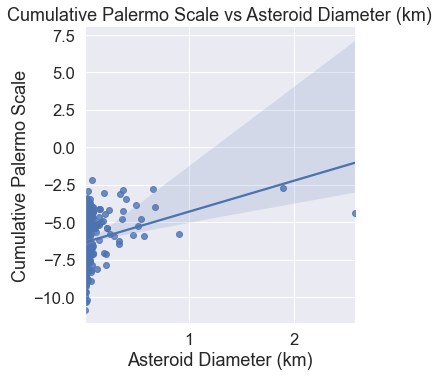

In [38]:
sns.set_theme(font_scale = 1.5)
graph2 = sns.lmplot(x = 'Asteroid Diameter (km)', y = 'Cumulative Palermo Scale', data = df)
graph2.set(title = 'Cumulative Palermo Scale vs Asteroid Diameter (km)')

### Comments
This lmplot shows the relationship between the diameter of an asteroid and the Cumulative Palermo Scale. The Palermo Scale shows the seriousness of an impact, taking into account the probability of impact, and energy of impact. A number below -2 shows that there are no serious consequences, in between -2 and 0 shows that the object should be closely monitored, and above 0 means that there could be serious consequences. Looking at the plot, it shows that there is a positive relation between the diameter of the asteroid and the Cumulative Palermo Scale.

## Plot 3: Cumulative Impact Probability vs Cumulative Palermo Scale


[Text(0.5, 1.0, 'Cumulative Impact Probability vs Cumulative Palermo Scale')]

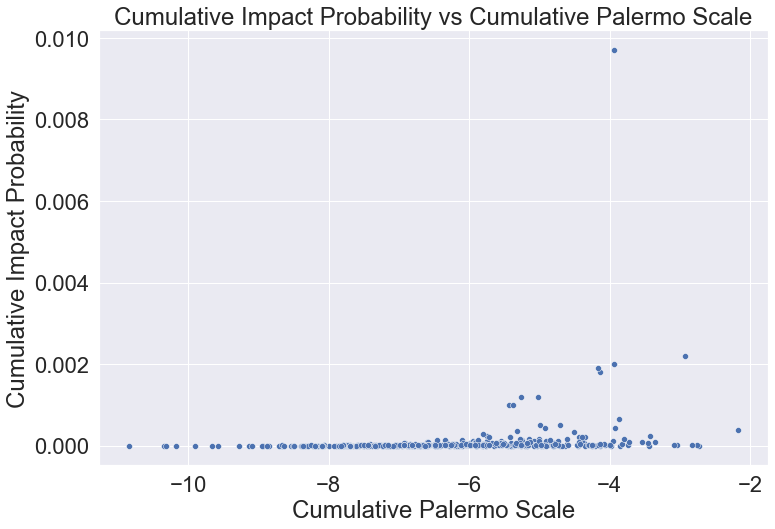

In [40]:
sns.set_theme(font_scale = 2)
plt.subplots(figsize=(12,8))
graph3 = sns.scatterplot(x = 'Cumulative Palermo Scale', y = 'Cumulative Impact Probability', data = df)
graph3.set(title= 'Cumulative Impact Probability vs Cumulative Palermo Scale')


### Comments
This scatterplot shows the relation between the Cumulative Palermo Scale and the Cumulative Impact Probability. Besides an outlier just below 0.010, most of the data ha a y-value in between 0.000 and 0.004. Towards the latter end of the plot, as the x-value increases, the y-value also slightly increases. Looking at this plot, I can conclude that there is a slight positive relation between the Cumulative Palermo Scale and the Cumulative Impact Probability